<a href="https://colab.research.google.com/github/kashindra-mahato/Computer-Vision/blob/main/Convolutional_autoencoder_for_image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [ ]:
def preprocess(array):
  """
  Normalizes the supplied array and reshapes it into the appropriate format.
  """

  array = array.astype("float32") / 255.0
  array = np.reshape(array, (len(array), 28, 28, 1))
  return array

In [ ]:
def noise(array):
  """
  Adds random noise to each image in the supplied array
  """
  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
      loc=0.0, scale=1.0, size=array.shape
  )

  return np.clip(noisy_array, 0.0, 1.0)

In [ ]:
def display(array1, array2):
  """
  Displays ten random images from each one of the supplied arrays.
  """

  n = 10
  indices = np.random.randint(len(array1), size=n)
  image1 = array1[indices, :]
  image2 = array2[indices, :]

  plt.figure(figsize=(20, 4))
  for i, (image1, image2) in enumerate(zip(image1, image2)):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image1.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(image2.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()

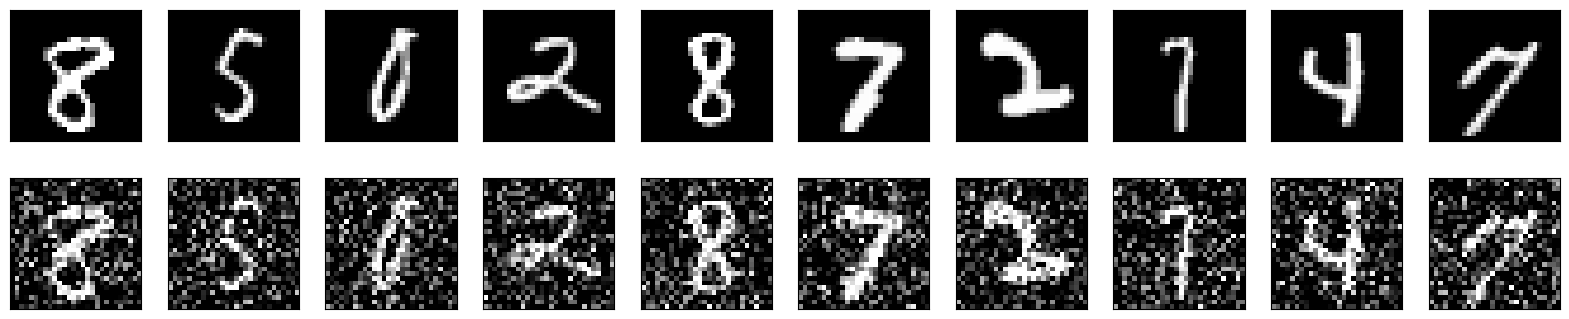

In [ ]:
# Prepare the data
# Since we only need images from the dataset to encode and decode, we
# won't use the labels
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [ ]:
# Build the autoencoder
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2,2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248  

In [ ]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data)
)

Epoch 1/50
469/469 [==============================] - 133s 282ms/step - loss: 0.1285 - val_loss: 0.0728
Epoch 2/50
469/469 [==============================] - 120s 255ms/step - loss: 0.0714 - val_loss: 0.0694
Epoch 3/50
469/469 [==============================] - 120s 255ms/step - loss: 0.0693 - val_loss: 0.0681
Epoch 4/50
469/469 [==============================] - 119s 253ms/step - loss: 0.0681 - val_loss: 0.0671
Epoch 5/50
469/469 [==============================] - 121s 257ms/step - loss: 0.0673 - val_loss: 0.0665
Epoch 6/50
469/469 [==============================] - 118s 252ms/step - loss: 0.0667 - val_loss: 0.0659
Epoch 7/50
469/469 [==============================] - 119s 254ms/step - loss: 0.0662 - val_loss: 0.0655
Epoch 8/50
469/469 [==============================] - 118s 252ms/step - loss: 0.0658 - val_loss: 0.0653
Epoch 9/50
469/469 [==============================] - 119s 254ms/step - loss: 0.0655 - val_loss: 0.0649
Epoch 10/50
469/469 [==============================] - 117s 250m

313/313 [==============================] - 10s 30ms/step


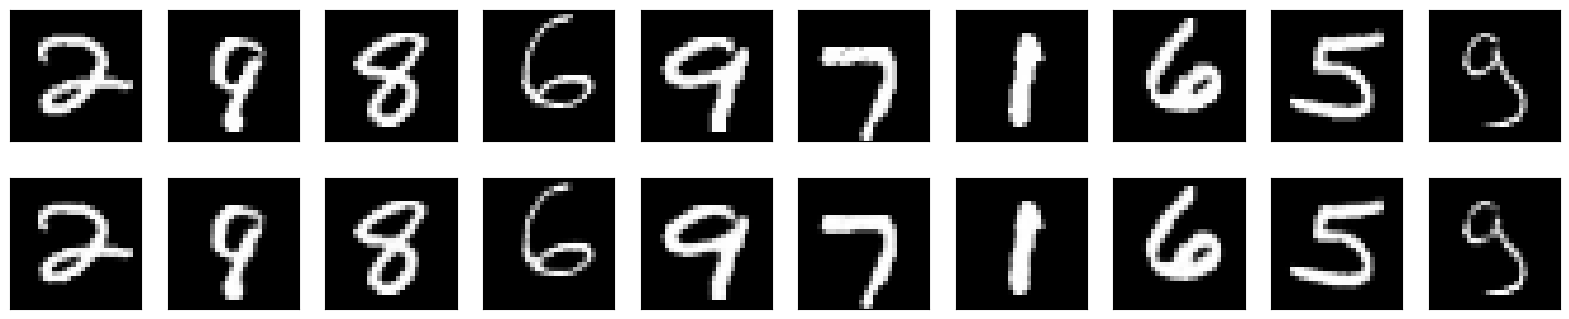

In [ ]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)